<img width="800px" src="../fidle/img/00-Fidle-header-01.svg"></img>

# <!-- TITLE --> [MNIST2] - Simple classification with CNN
<!-- DESC --> An example of classification using a convolutional neural network for the famous MNIST dataset
<!-- AUTHOR : Jean-Luc Parouty (CNRS/SIMaP) -->

## Objectives :
 - Recognizing handwritten numbers
 - Understanding the principle of a classifier DNN network 
 - Implementation with Keras 


The [MNIST dataset](http://yann.lecun.com/exdb/mnist/) (Modified National Institute of Standards and Technology) is a must for Deep Learning.  
It consists of 60,000 small images of handwritten numbers for learning and 10,000 for testing.


## What we're going to do :

 - Retrieve data
 - Preparing the data
 - Create a model
 - Train the model
 - Evaluate the result


## Step 1 - Init python stuff

In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt
import sys,os
from importlib import reload

sys.path.append('..')
import fidle.pwk as pwk

datasets_dir = pwk.init('MNIST1')

<br>**FIDLE 2020 - Practical Work Module**

Version              : 2.0.17
Notebook id          : MNIST1
Run time             : Monday 01 March 2021, 18:42:45
TensorFlow version   : 2.4.0
Keras version        : 2.4.0
Datasets dir         : /gpfswork/rech/mlh/uja62cb/datasets
Run dir              : ./run
Update keras cache   : False
Save figs            : True
Path figs            : ./run/figs


## Step 2 - Retrieve data
MNIST is one of the most famous historic dataset.  
Include in [Keras datasets](https://www.tensorflow.org/api_docs/python/tf/keras/datasets)

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

x_train = x_train.reshape(-1,28,28,1)
x_test  = x_test.reshape(-1,28,28,1)

print("x_train : ",x_train.shape)
print("y_train : ",y_train.shape)
print("x_test  : ",x_test.shape)
print("y_test  : ",y_test.shape)

x_train :  (60000, 28, 28, 1)
y_train :  (60000,)
x_test  :  (10000, 28, 28, 1)
y_test  :  (10000,)


## Step 3 - Preparing the data

In [3]:
print('Before normalization : Min={}, max={}'.format(x_train.min(),x_train.max()))

xmax=x_train.max()
x_train = x_train / xmax
x_test  = x_test  / xmax

print('After normalization  : Min={}, max={}'.format(x_train.min(),x_train.max()))

Before normalization : Min=0, max=255


After normalization  : Min=0.0, max=1.0


### Have a look

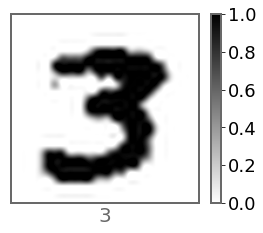

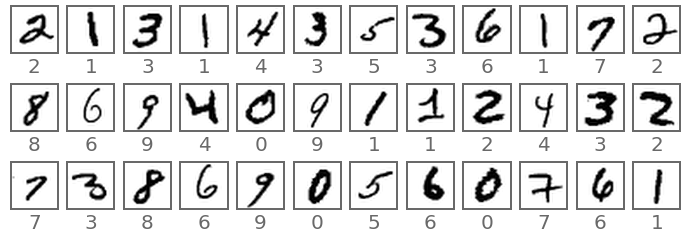

In [4]:
pwk.plot_images(x_train, y_train, [27],  x_size=5,y_size=5, colorbar=True, save_as='01-one-digit')
pwk.plot_images(x_train, y_train, range(5,41), columns=12, save_as='02-many-digits')

## Step 4 - Create model
About informations about : 
 - [Optimizer](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers)
 - [Activation](https://www.tensorflow.org/api_docs/python/tf/keras/activations)
 - [Loss](https://www.tensorflow.org/api_docs/python/tf/keras/losses)
 - [Metrics](https://www.tensorflow.org/api_docs/python/tf/keras/metrics)

In [5]:
hidden1     = 100
hidden2     = 100

model = keras.models.Sequential()

model.add( keras.layers.Input((28,28,1)) )

model.add( keras.layers.Conv2D(8, (3,3),  activation='relu') )
model.add( keras.layers.MaxPooling2D((2,2)))
model.add( keras.layers.Dropout(0.2))

model.add( keras.layers.Conv2D(16, (3,3), activation='relu') )
model.add( keras.layers.MaxPooling2D((2,2)))
model.add( keras.layers.Dropout(0.2))

model.add( keras.layers.Flatten()) 
model.add( keras.layers.Dense(100, activation='relu'))
model.add( keras.layers.Dropout(0.5))

model.add( keras.layers.Dense(10, activation='softmax'))

In [6]:
model.summary()

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 8)         80        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 8)         0         
_________________________________________________________________
dropout (Dropout)            (None, 13, 13, 8)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 16)        1168      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 16)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 5, 5, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 400)               0

## Step 5 - Train the model

In [7]:
batch_size  = 512
epochs      =  16

history = model.fit(  x_train, y_train,
                      batch_size      = batch_size,
                      epochs          = epochs,
                      verbose         = 1,
                      validation_data = (x_test, y_test))

Epoch 1/16


  1/118 [..............................] - ETA: 5:49 - loss: 2.4933 - accuracy: 0.0723

 22/118 [====>.........................] - ETA: 0s - loss: 2.2701 - accuracy: 0.1780  

 43/118 [=========>....................] - ETA: 0s - loss: 2.1020 - accuracy: 0.2597

 64/118 [===============>..............] - ETA: 0s - loss: 1.9429 - accuracy: 0.3244

 85/118 [====================>.........] - ETA: 0s - loss: 1.8063 - accuracy: 0.3766

106/118 [=========================>....] - ETA: 0s - loss: 1.6912 - accuracy: 0.4195

118/118 [==============================] - ETA: 0s - loss: 1.6336 - accuracy: 0.4407

118/118 [==============================] - 4s 10ms/step - loss: 1.6292 - accuracy: 0.4424 - val_loss: 0.2711 - val_accuracy: 0.9273


Epoch 2/16
  1/118 [..............................] - ETA: 0s - loss: 0.4906 - accuracy: 0.8574

 22/118 [====>.........................] - ETA: 0s - loss: 0.5000 - accuracy: 0.8472

 43/118 [=========>....................] - ETA: 0s - loss: 0.4865 - accuracy: 0.8514

 64/118 [===============>..............] - ETA: 0s - loss: 0.4740 - accuracy: 0.8550

 84/118 [====================>.........] - ETA: 0s - loss: 0.4639 - accuracy: 0.8578

105/118 [=========================>....] - ETA: 0s - loss: 0.4543 - accuracy: 0.8606

118/118 [==============================] - 0s 3ms/step - loss: 0.4483 - accuracy: 0.8623 - val_loss: 0.1540 - val_accuracy: 0.9548


Epoch 3/16
  1/118 [..............................] - ETA: 0s - loss: 0.3151 - accuracy: 0.9043

 22/118 [====>.........................] - ETA: 0s - loss: 0.3156 - accuracy: 0.9038

 43/118 [=========>....................] - ETA: 0s - loss: 0.3135 - accuracy: 0.9034

 65/118 [===============>..............] - ETA: 0s - loss: 0.3081 - accuracy: 0.9049

 85/118 [====================>.........] - ETA: 0s - loss: 0.3046 - accuracy: 0.9062

105/118 [=========================>....] - ETA: 0s - loss: 0.3012 - accuracy: 0.9074

118/118 [==============================] - 0s 3ms/step - loss: 0.2990 - accuracy: 0.9082 - val_loss: 0.1112 - val_accuracy: 0.9661


Epoch 4/16
  1/118 [..............................] - ETA: 0s - loss: 0.2561 - accuracy: 0.9316

 22/118 [====>.........................] - ETA: 0s - loss: 0.2441 - accuracy: 0.9256

 43/118 [=========>....................] - ETA: 0s - loss: 0.2438 - accuracy: 0.9256

 64/118 [===============>..............] - ETA: 0s - loss: 0.2426 - accuracy: 0.9259

 85/118 [====================>.........] - ETA: 0s - loss: 0.2409 - accuracy: 0.9265

105/118 [=========================>....] - ETA: 0s - loss: 0.2391 - accuracy: 0.9270

118/118 [==============================] - 0s 3ms/step - loss: 0.2381 - accuracy: 0.9273 - val_loss: 0.0908 - val_accuracy: 0.9706


Epoch 5/16
  1/118 [..............................] - ETA: 0s - loss: 0.2276 - accuracy: 0.9277

 21/118 [====>.........................] - ETA: 0s - loss: 0.2143 - accuracy: 0.9352

 42/118 [=========>....................] - ETA: 0s - loss: 0.2124 - accuracy: 0.9362

 63/118 [===============>..............] - ETA: 0s - loss: 0.2121 - accuracy: 0.9365

 83/118 [====================>.........] - ETA: 0s - loss: 0.2108 - accuracy: 0.9370

103/118 [=========================>....] - ETA: 0s - loss: 0.2097 - accuracy: 0.9374

118/118 [==============================] - 0s 3ms/step - loss: 0.2089 - accuracy: 0.9378 - val_loss: 0.0783 - val_accuracy: 0.9741


Epoch 6/16
  1/118 [..............................] - ETA: 0s - loss: 0.2157 - accuracy: 0.9355

 22/118 [====>.........................] - ETA: 0s - loss: 0.1911 - accuracy: 0.9428

 42/118 [=========>....................] - ETA: 0s - loss: 0.1882 - accuracy: 0.9441

 62/118 [==============>...............] - ETA: 0s - loss: 0.1870 - accuracy: 0.9447

 82/118 [===================>..........] - ETA: 0s - loss: 0.1864 - accuracy: 0.9450

103/118 [=========================>....] - ETA: 0s - loss: 0.1860 - accuracy: 0.9452

118/118 [==============================] - 0s 3ms/step - loss: 0.1857 - accuracy: 0.9453 - val_loss: 0.0696 - val_accuracy: 0.9766


Epoch 7/16
  1/118 [..............................] - ETA: 0s - loss: 0.2443 - accuracy: 0.9453

 22/118 [====>.........................] - ETA: 0s - loss: 0.1923 - accuracy: 0.9468

 43/118 [=========>....................] - ETA: 0s - loss: 0.1850 - accuracy: 0.9475

 63/118 [===============>..............] - ETA: 0s - loss: 0.1808 - accuracy: 0.9479

 83/118 [====================>.........] - ETA: 0s - loss: 0.1781 - accuracy: 0.9482

103/118 [=========================>....] - ETA: 0s - loss: 0.1765 - accuracy: 0.9485

118/118 [==============================] - 0s 3ms/step - loss: 0.1757 - accuracy: 0.9486 - val_loss: 0.0640 - val_accuracy: 0.9785


Epoch 8/16
  1/118 [..............................] - ETA: 0s - loss: 0.2068 - accuracy: 0.9336

 21/118 [====>.........................] - ETA: 0s - loss: 0.1848 - accuracy: 0.9467

 42/118 [=========>....................] - ETA: 0s - loss: 0.1804 - accuracy: 0.9480

 62/118 [==============>...............] - ETA: 0s - loss: 0.1776 - accuracy: 0.9486

 83/118 [====================>.........] - ETA: 0s - loss: 0.1752 - accuracy: 0.9492

104/118 [=========================>....] - ETA: 0s - loss: 0.1731 - accuracy: 0.9496

118/118 [==============================] - 0s 3ms/step - loss: 0.1716 - accuracy: 0.9499 - val_loss: 0.0575 - val_accuracy: 0.9803


Epoch 9/16
  1/118 [..............................] - ETA: 0s - loss: 0.1963 - accuracy: 0.9395

 20/118 [====>.........................] - ETA: 0s - loss: 0.1640 - accuracy: 0.9484

 39/118 [========>.....................] - ETA: 0s - loss: 0.1604 - accuracy: 0.9500

 59/118 [==============>...............] - ETA: 0s - loss: 0.1586 - accuracy: 0.9508

 79/118 [===================>..........] - ETA: 0s - loss: 0.1569 - accuracy: 0.9514

 99/118 [========================>.....] - ETA: 0s - loss: 0.1556 - accuracy: 0.9519

118/118 [==============================] - 0s 3ms/step - loss: 0.1549 - accuracy: 0.9522 - val_loss: 0.0540 - val_accuracy: 0.9826


Epoch 10/16


  1/118 [..............................] - ETA: 0s - loss: 0.1643 - accuracy: 0.9473

 22/118 [====>.........................] - ETA: 0s - loss: 0.1471 - accuracy: 0.9543

 43/118 [=========>....................] - ETA: 0s - loss: 0.1431 - accuracy: 0.9564

 64/118 [===============>..............] - ETA: 0s - loss: 0.1417 - accuracy: 0.9572

 85/118 [====================>.........] - ETA: 0s - loss: 0.1409 - accuracy: 0.9576

106/118 [=========================>....] - ETA: 0s - loss: 0.1407 - accuracy: 0.9576

118/118 [==============================] - 0s 3ms/step - loss: 0.1406 - accuracy: 0.9576 - val_loss: 0.0514 - val_accuracy: 0.9832


Epoch 11/16
  1/118 [..............................] - ETA: 0s - loss: 0.1254 - accuracy: 0.9668

 22/118 [====>.........................] - ETA: 0s - loss: 0.1314 - accuracy: 0.9590

 43/118 [=========>....................] - ETA: 0s - loss: 0.1320 - accuracy: 0.9590

 65/118 [===============>..............] - ETA: 0s - loss: 0.1337 - accuracy: 0.9587

 85/118 [====================>.........] - ETA: 0s - loss: 0.1338 - accuracy: 0.9589

105/118 [=========================>....] - ETA: 0s - loss: 0.1337 - accuracy: 0.9591

118/118 [==============================] - 0s 3ms/step - loss: 0.1336 - accuracy: 0.9592 - val_loss: 0.0494 - val_accuracy: 0.9842


Epoch 12/16
  1/118 [..............................] - ETA: 0s - loss: 0.1340 - accuracy: 0.9707

 22/118 [====>.........................] - ETA: 0s - loss: 0.1399 - accuracy: 0.9613

 43/118 [=========>....................] - ETA: 0s - loss: 0.1352 - accuracy: 0.9618

 63/118 [===============>..............] - ETA: 0s - loss: 0.1328 - accuracy: 0.9619

 83/118 [====================>.........] - ETA: 0s - loss: 0.1318 - accuracy: 0.9619

103/118 [=========================>....] - ETA: 0s - loss: 0.1310 - accuracy: 0.9619

118/118 [==============================] - 0s 3ms/step - loss: 0.1305 - accuracy: 0.9619 - val_loss: 0.0481 - val_accuracy: 0.9843


Epoch 13/16
  1/118 [..............................] - ETA: 0s - loss: 0.1318 - accuracy: 0.9648

 22/118 [====>.........................] - ETA: 0s - loss: 0.1134 - accuracy: 0.9643

 42/118 [=========>....................] - ETA: 0s - loss: 0.1163 - accuracy: 0.9638

 62/118 [==============>...............] - ETA: 0s - loss: 0.1182 - accuracy: 0.9635

 82/118 [===================>..........] - ETA: 0s - loss: 0.1193 - accuracy: 0.9634

102/118 [========================>.....] - ETA: 0s - loss: 0.1200 - accuracy: 0.9633

118/118 [==============================] - 0s 3ms/step - loss: 0.1204 - accuracy: 0.9633 - val_loss: 0.0469 - val_accuracy: 0.9848


Epoch 14/16
  1/118 [..............................] - ETA: 0s - loss: 0.1217 - accuracy: 0.9668

 22/118 [====>.........................] - ETA: 0s - loss: 0.1101 - accuracy: 0.9658

 43/118 [=========>....................] - ETA: 0s - loss: 0.1119 - accuracy: 0.9652

 64/118 [===============>..............] - ETA: 0s - loss: 0.1136 - accuracy: 0.9649

 85/118 [====================>.........] - ETA: 0s - loss: 0.1147 - accuracy: 0.9646

106/118 [=========================>....] - ETA: 0s - loss: 0.1155 - accuracy: 0.9643

118/118 [==============================] - 0s 3ms/step - loss: 0.1159 - accuracy: 0.9642 - val_loss: 0.0430 - val_accuracy: 0.9862


Epoch 15/16
  1/118 [..............................] - ETA: 0s - loss: 0.1516 - accuracy: 0.9609

 22/118 [====>.........................] - ETA: 0s - loss: 0.1269 - accuracy: 0.9655

 42/118 [=========>....................] - ETA: 0s - loss: 0.1218 - accuracy: 0.9662

 62/118 [==============>...............] - ETA: 0s - loss: 0.1195 - accuracy: 0.9664

 83/118 [====================>.........] - ETA: 0s - loss: 0.1182 - accuracy: 0.9665

104/118 [=========================>....] - ETA: 0s - loss: 0.1174 - accuracy: 0.9665

118/118 [==============================] - 0s 3ms/step - loss: 0.1172 - accuracy: 0.9665 - val_loss: 0.0421 - val_accuracy: 0.9864


Epoch 16/16
  1/118 [..............................] - ETA: 0s - loss: 0.1580 - accuracy: 0.9512

 21/118 [====>.........................] - ETA: 0s - loss: 0.1144 - accuracy: 0.9648

 41/118 [=========>....................] - ETA: 0s - loss: 0.1127 - accuracy: 0.9655

 61/118 [==============>...............] - ETA: 0s - loss: 0.1123 - accuracy: 0.9659

 81/118 [===================>..........] - ETA: 0s - loss: 0.1119 - accuracy: 0.9661

101/118 [========================>.....] - ETA: 0s - loss: 0.1117 - accuracy: 0.9663

118/118 [==============================] - 0s 3ms/step - loss: 0.1115 - accuracy: 0.9664 - val_loss: 0.0395 - val_accuracy: 0.9868


## Step 6 - Evaluate
### 6.1 - Final loss and accuracy
Note : With a DNN, we had a precision of the order of : 97.7%

In [8]:
score = model.evaluate(x_test, y_test, verbose=0)

print(f'Test loss     : {score[0]:4.4f}')
print(f'Test accuracy : {score[1]:4.4f}')

Test loss     : 0.0395
Test accuracy : 0.9868


### 6.2 - Plot history

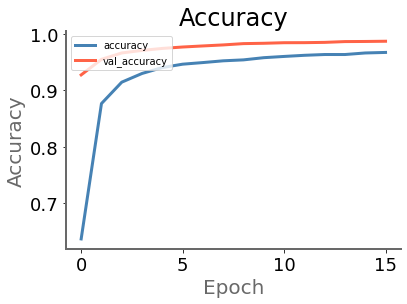

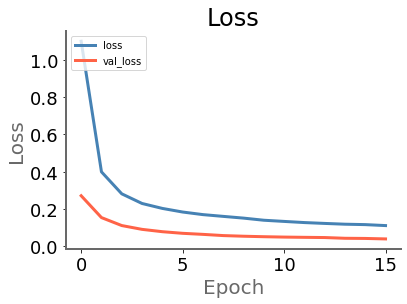

In [9]:
pwk.plot_history(history, figsize=(6,4), save_as='03-history')

### 6.3 - Plot results

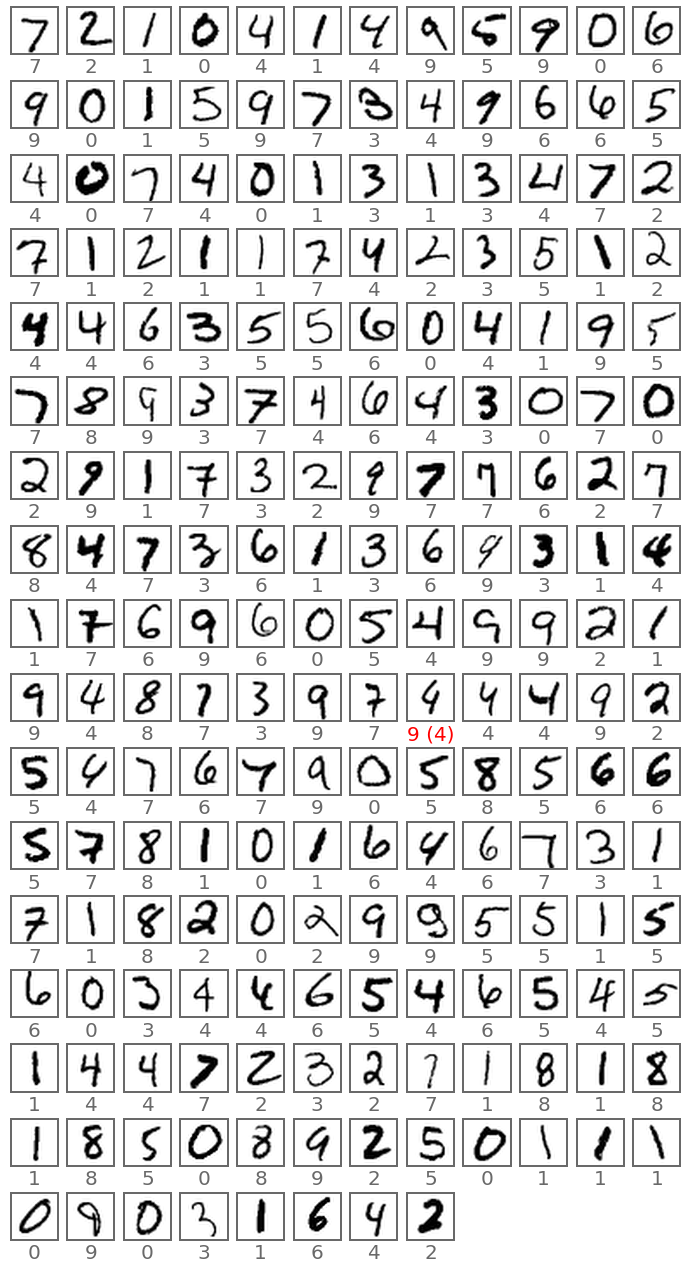

In [10]:
#y_pred   = model.predict_classes(x_test)           Deprecated after 01/01/2021 !!

y_sigmoid = model.predict(x_test)
y_pred    = np.argmax(y_sigmoid, axis=-1)

pwk.plot_images(x_test, y_test, range(0,200), columns=12, x_size=1, y_size=1, y_pred=y_pred, save_as='04-predictions')

### 6.4 - Plot some errors

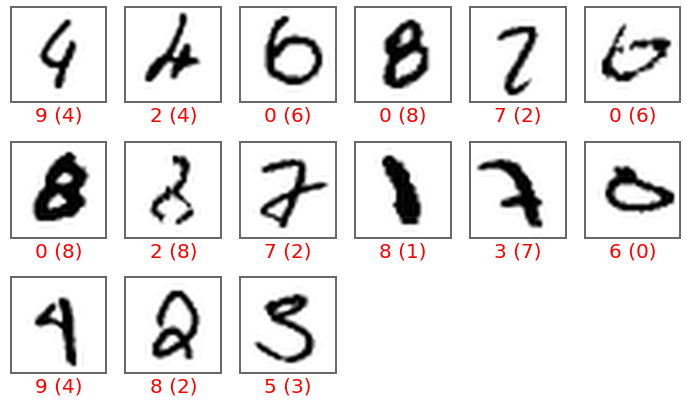

In [11]:
errors=[ i for i in range(len(x_test)) if y_pred[i]!=y_test[i] ]
errors=errors[:min(24,len(errors))]
pwk.plot_images(x_test, y_test, errors[:15], columns=6, x_size=2, y_size=2, y_pred=y_pred, save_as='05-some-errors')

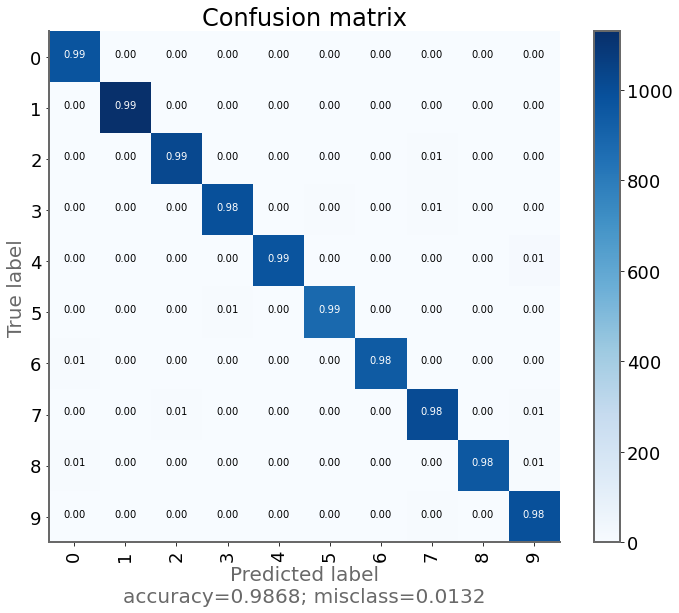

In [12]:
pwk.plot_confusion_matrix(y_test,y_pred,range(10),normalize=True, save_as='06-confusion-matrix')

In [13]:
pwk.end()

End time is : Monday 01 March 2021, 18:43:32
Duration is : 00:00:47 045ms
This notebook ends here


<div class="todo">
    A few things you can do for fun:
    <ul>
        <li>Changing the network architecture (layers, number of neurons, etc.)</li>
        <li>Display a summary of the network</li>
        <li>Retrieve and display the softmax output of the network, to evaluate its "doubts".</li>
    </ul>
</div>

---
<img width="80px" src="../fidle/img/00-Fidle-logo-01.svg"></img>